Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.0166 - accuracy: 0.8936 - val_loss: 0.0093 - val_accuracy: 0.9415
Epoch 2/20
 - 2s - loss: 0.0078 - accuracy: 0.9512 - val_loss: 0.0065 - val_accuracy: 0.9584
Epoch 3/20
 - 2

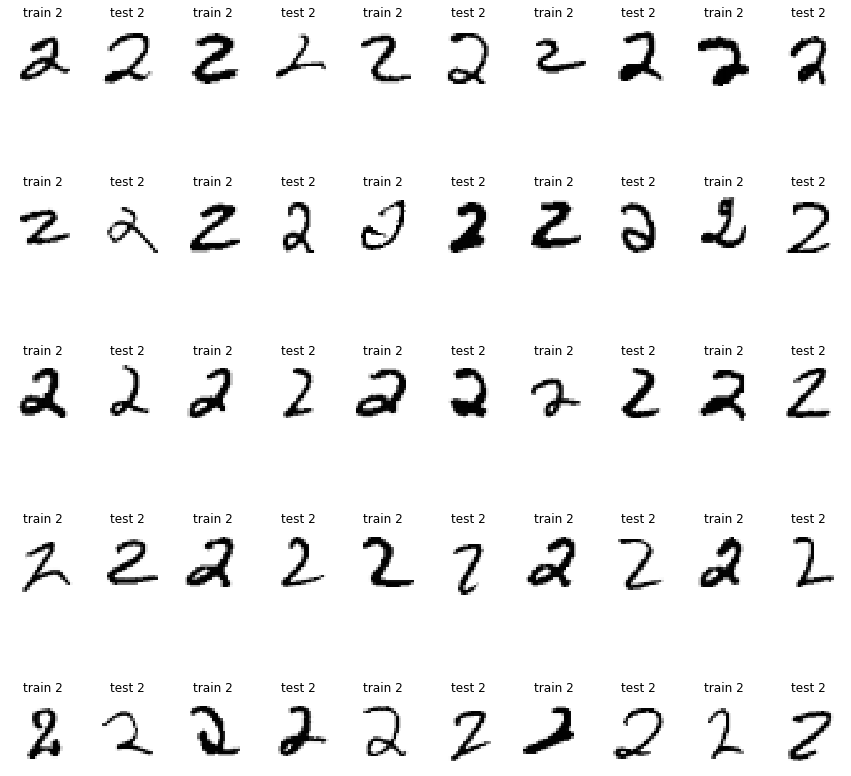

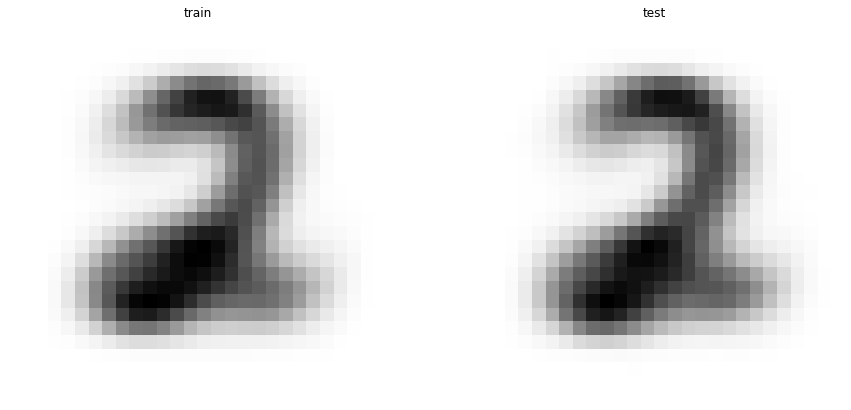

In [2]:
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
#from keras.layers.core import Dense, Flatten
from keras.layers import Input, Dense, Flatten, Reshape
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist


def DrawImages(nrows,ncols,N,x_train,y_train,x_test,y_test):
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15,15))
    #Считать число элементов будет по этой штуке
    n=N
    #по очереди выводить элементы по этой штуке
    k=0
    for row in range(nrows):
        for col in range(ncols):
            if k%2==0:
                ax[row,col].imshow(x_train[n],cmap='Greys',interpolation='None')
                ax[row,col].set_title("train {}".format(y_train[n]))
                ax[row,col].axis('off')
            else:
                ax[row,col].imshow(x_test[n],cmap='Greys',interpolation='None')
                ax[row,col].set_title("test {}".format(y_test[n]))
                ax[row,col].axis('off')
            k+=1
            n+=1


def DrawNum(number,x_train,y_train,x_test,y_test):
    mask=(y_train==number)
    XNum_train=x_train[mask]
    yNum_train=y_train[mask]
    mask=(y_test==number)
    XNum_test=x_test[mask]
    yNum_test=y_test[mask]
    DrawImages(5,10,0,XNum_train,yNum_train,XNum_test,yNum_test)

def Out(N, x_train, x_test, y_train, y_test):
            mask = (y_train == N)
            XNum_train = x_train[mask]
            yNum_train = y_train[mask]
            mask = (y_test == N)
            XNum_test = x_test[mask]
            yNum_test = y_test[mask]
            Train_Num = sum(XNum_train)
            Test_Num = sum(XNum_test)
            fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 15))
            ax[0].imshow(Train_Num, cmap='Greys', interpolation='None')
            ax[0].set_title("train")
            ax[0].axis('off')

            ax[1].imshow(Test_Num, cmap='Greys', interpolation='None')
            ax[1].set_title("test")
            ax[1].axis('off')

def prog(drawNum=True,Meth=0,out=True):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    if(drawNum):
        DrawNum(2,x_train,y_train,x_test,y_test)

    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    x_train /= 255.
    x_test /= 255.

    Y_train = to_categorical(y_train, 10)
    Y_test = to_categorical(y_test, 10)

    if(Meth==0):
        input_shape = (28, 28)

        inp = Input(shape=input_shape)

        x = Flatten()(inp)

        x = Dense(units=256, activation='relu')(x)

        output = Dense(units=10, activation='softmax')(x)

        model = Model(inputs=inp, outputs=output)

        model.summary()
        model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

        history = model.fit(x_train, Y_train, batch_size=256, epochs=20, verbose=2, validation_data=(x_test, Y_test))
    elif(Meth==1):
        input_shape = (28, 28)

        inp = Input(shape=input_shape)

        x = Reshape((28 * 28,))(inp)

        x = Dense(units=256, activation='relu')(x)

        output = Dense(units=10, activation='softmax')(x)

        model = Model(inputs=inp, outputs=output)

        model.summary()
        model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

        history = model.fit(x_train, Y_train, batch_size=256, epochs=20, verbose=2, validation_data=(x_test, Y_test))

    elif(Meth==2):
        x_train = np.reshape(x_train, (60000, -1))
        x_test = np.reshape(x_test, (10000, -1))

        inp = Input(shape=(28 * 28,))

        x = Dense(units=256, activation='relu')(inp)

        output = Dense(units=10, activation='softmax')(x)

        model = Model(inputs=inp, outputs=output)

        model.summary()
        model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

        history = model.fit(x_train, Y_train, batch_size=256, epochs=20, verbose=2, validation_data=(x_test, Y_test))

        x_train = np.reshape(x_train, (60000, 28, 28))
        x_test = np.reshape(x_test, (10000, 28, 28))


    if(out):
        Out(2,x_train,x_test,y_train,y_test)


prog(True,0,True)

